In [2]:
from pvextractor import Path
from astropy.coordinates import SkyCoord
from astropy import units as u

In [3]:
path1 = Path([(50., 50.), (150., 150.)])
path2 = Path(SkyCoord([29.011, 28.751]*u.deg, [3.463, 3.665]*u.deg, frame='galactic'),width=50*u.arcsec)
path3 = Path(SkyCoord([28.943, 28.674]*u.deg, [3.375, 3.574]*u.deg, frame='galactic'),width=50*u.arcsec)
path4 = Path(SkyCoord([28.892, 28.630]*u.deg, [3.332, 3.549]*u.deg, frame='galactic'),width=50*u.arcsec)


In [4]:
from pvextractor import extract_pv_slice
# slice1 = extract_pv_slice(array, path1)  
u.add_enabled_units(u.def_unit(["K (Tmb)"], represents=u.K)) #define the unit K (Tmb) and make it in Kelvin

from spectral_cube import SpectralCube
cube = SpectralCube.read('../FEEDBACK_W40_CII_OC9N.lmv.fits')  
cube_slice = cube.spectral_slab(0*u.km/u.s, 15*u.km/u.s)
slice2 = extract_pv_slice(cube_slice, path2)  
slice3 = extract_pv_slice(cube_slice, path3)  
slice4 = extract_pv_slice(cube_slice, path4)  


# slice3 = extract_pv_slice('my_cube.fits', path3)  

/home/mingkang/.local/lib/python3.10/site-packages/pvextractor/geometry/path.py:262: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.append(MPLPolygon(list(zip(poly.x, poly.y)), **kwargs))
/home/mingkang/.local/lib/python3.10/site-packages/pvextractor/geometry/path.py:262: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.append(MPLPolygon(list(zip(poly.x, poly.y)), **kwargs))
/home/mingkang/.local/lib/python3.10/site-packages/pvextractor/geometry/path.py:262: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.append(MPLPolygon(list(zip(poly.x, poly.y)), **kwargs))


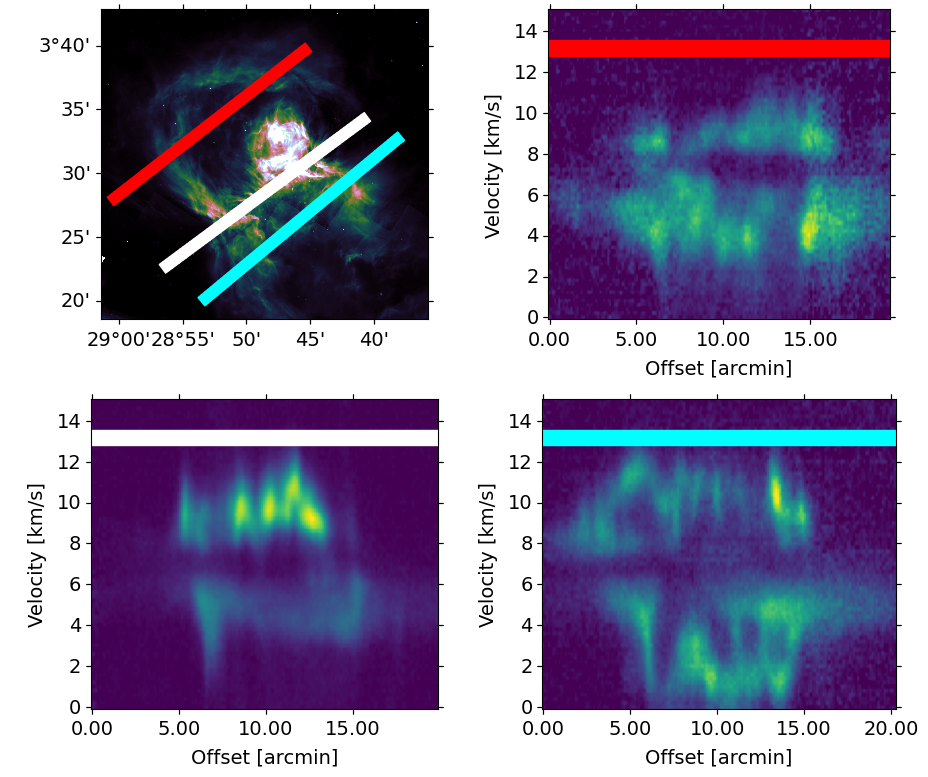

In [14]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Set the default font size
plt.rcParams['font.size'] = 14

plt.figure(figsize=(10,8))
path_galactic = '../w40_c18o.fits'
wcs_galactic = WCS(fits.open(path_galactic)[0].header).celestial[0:2]
ax = plt.subplot(221, projection=wcs_galactic)
import all_functions
all_functions.spitzer_on_galactic(ax,xlim=(-12, 65), ylim=(-8, 65))
# ax.imshow(cube[500].value, transform=ax.get_transform(cube.wcs.celestial))  
path2.show_on_axis(ax, spacing=1, color='r')
path3.show_on_axis(ax, spacing=1, color='w')
path4.show_on_axis(ax, spacing=1, color='cyan')

ww = WCS(slice2.header)
ax2 = plt.subplot(222,projection=ww)
im = ax2.imshow(slice2.data, origin='lower',vmin=0)
ax2.coords[0].set_format_unit(u.arcmin)
ax2.coords[1].set_format_unit(u.km/u.s)

ax2.set_ylabel("Velocity [km/s]")
ax2.set_xlabel("Offset [arcmin]")

ax2.set_aspect(2)
ww = WCS(slice3.header)
ax3 = plt.subplot(223,projection=ww)
im = ax3.imshow(slice3.data, origin='lower',vmin=0)
ax3.coords[0].set_format_unit(u.arcmin)
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_ylabel("Velocity [km/s]")
ax3.set_xlabel("Offset [arcmin]")
ax3.set_aspect(2)
ww = WCS(slice4.header)
ax4 = plt.subplot(224,projection=ww)
im = ax4.imshow(slice4.data, origin='lower',vmin=0)
ax4.coords[0].set_format_unit(u.arcmin)
ax4.coords[1].set_format_unit(u.km/u.s)
ax4.set_ylabel("Velocity [km/s]")
ax4.set_xlabel("Offset [arcmin]")
ax4.set_aspect(2)

# Define the rectangle parameters
x = 0  # x position of the left side of the rectangle
y = 0.85  # y position of the bottom of the rectangle, 0.9 to put it at the top
width = 1  # width of the rectangle, 1 to span the entire width of the plot
height = 0.05  # height of the rectangle

# Create a new rectangle for each subplot and add it
rectangle2 = Rectangle((x, y), width, height, color='red', transform=ax2.transAxes)
rectangle3 = Rectangle((x, y), width, height, color='white', transform=ax3.transAxes)
rectangle4 = Rectangle((x, y), width, height, color='cyan', transform=ax4.transAxes)

ax2.add_artist(rectangle2)
ax3.add_artist(rectangle3)
ax4.add_artist(rectangle4)

plt.tight_layout()
plt.savefig('pv_cii.png')

Below for a closed up 2 km/s component

/home/mingkang/.local/lib/python3.10/site-packages/pvextractor/geometry/path.py:262: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.append(MPLPolygon(list(zip(poly.x, poly.y)), **kwargs))


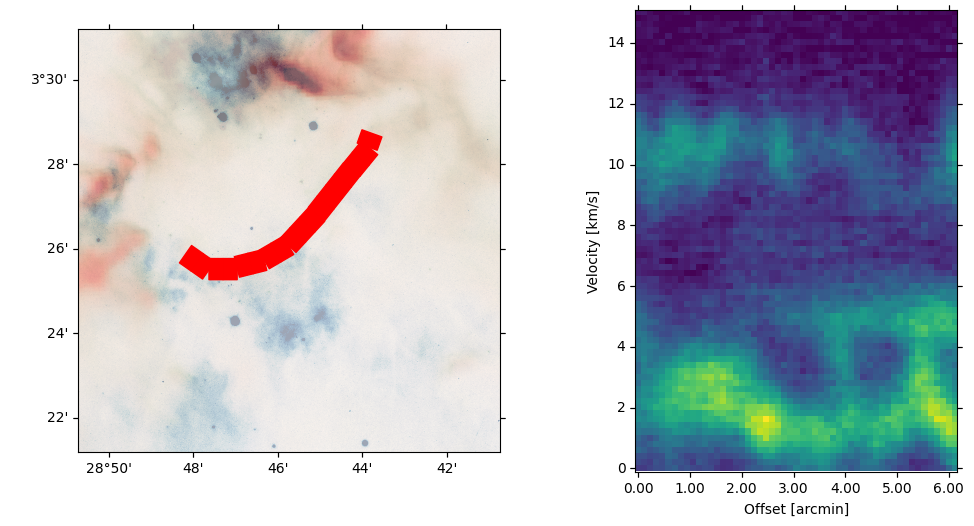

In [1]:
from pvextractor import Path
from astropy.coordinates import SkyCoord
from astropy import units as u

path = Path(SkyCoord([28.8030915258, 28.7946703673,28.7862491921,28.7727751952,28.7626694817,28.7525633575,28.7399302080,28.7323501365,28.7281383697]*u.deg, 
                     [3.4312704154, 3.4253860541,3.4253859133,3.4287479872,3.4346318719,3.4455593305,3.4615301875,3.4707763738,3.4825446223]*u.deg, frame='galactic'),width=30*u.arcsec)

from pvextractor import extract_pv_slice
# slice1 = extract_pv_slice(array, path1)  

from spectral_cube import SpectralCube
cube = SpectralCube.read('FEEDBACK_W40_CII_OC9N.lmv.fits')  
cube_slice = cube.spectral_slab(0*u.km/u.s, 15*u.km/u.s)
slice = extract_pv_slice(cube_slice, path)  

from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
path_galactic = 'w40_c18o.fits'
wcs_galactic = WCS(fits.open(path_galactic)[0].header).celestial[0:2]
ax = plt.subplot(121, projection=wcs_galactic)
import all_functions
all_functions.spitzer_on_galactic2(ax,xlim=(20, 50), ylim=(0, 30),cmap='Greens',alpha=1)
all_functions.halpha_on_galactic(ax,xlim=(20, 50), ylim=(0, 30),cmap='Blues',alpha=0.75)
all_functions.spire_on_galactic(ax,xlim=(20, 50), ylim=(0, 30),cmap='Reds',alpha=0.5)
# ax.imshow(cube[500].value, transform=ax.get_transform(cube.wcs.celestial))  
# path2.show_on_axis(ax, spacing=1, color='r')
path.show_on_axis(ax, spacing=1, color='r')
# path4.show_on_axis(ax, spacing=1, color='cyan')

ww = WCS(slice.header)
ax2 = plt.subplot(122,projection=ww)
im = ax2.imshow(slice.data, origin='lower',vmin=0)
ax2.coords[0].set_format_unit(u.arcmin)
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_ylabel("Velocity [km/s]")
ax2.set_xlabel("Offset [arcmin]")
ax2.set_aspect(1)

 